# Importing Libraries

In [1]:
import requests as r
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# Scrapping Data

In [242]:
web = r.get("https://ask.piaic.org/")

In [243]:
soup = bs(web.text,"html.parser")

In [244]:
x,y = [],[]

## Scrapping All Categories Pages

In [245]:
pages = []
for i in soup.find_all("a",class_="qa-nav-cat-link"):
    i = "https://ask.piaic.org/"+i['href']
    pages.append(i.replace("./",""))
pages.remove(pages[0])

In [246]:
label = ["4ir","general","AI","android",'blockchain','cloud-native',
        "Git","iot","ios","web"]
len(label)

10

In [247]:
names = {
    0 : '4ir',
    1 : 'general',
    2 : 'AI',
    3 : 'android',
    4 : 'blockchain',
    5 : 'cloud-native',
    6 : 'Git',
    7 : 'iot',
    8 : 'ios',
    9 : 'web'
}

## Scrapping Questions and Labels from all Categories

In [252]:
k = 0
for i in pages:
    
    page = r.get(i)
    soup = bs(page.text,"html.parser")
    
    questions = []
    for i in soup.find_all("div",class_='qa-q-item-title'):
        questions.append(i.getText().replace("\n","").replace("\t",""))
        x.append(i.getText().replace("\n","").replace("\t",""))
        
    for i in range(len(questions)):
        y.append(label[k])
    
    k=k+1
    

# The data was 263 but i have run the above cell 3 times as to collect more data

In [253]:
len(x),len(y)

(789, 789)

## Changing Labels Into Numbers

In [254]:
l=[]
for i in y:
    if i == '4ir':
        l.append(0)
    elif i == 'general':
        l.append(1)
    elif i == 'AI':
        l.append(2)
    elif i == 'android':
        l.append(3)
    elif i == 'blockchain':
        l.append(4)
    elif i == 'cloud-native':
        l.append(5)
    elif i == 'Git':
        l.append(6)
    elif i == 'iot':
        l.append(7)
    elif i == 'ios':
        l.append(8)
    elif i == 'web':
        l.append(9)  

In [255]:
data = {"Questions":x,"Label":l}

In [256]:
len(x),len(l)

(789, 789)

# Making Data Frame and Saving Data 

In [257]:
df = pd.DataFrame(data=data)

df = shuffle(df)

df.to_csv("Ask_PIAIC.csv")

df.head()

,Questions,Label
11,fee voucher issue,0
773,unable to run,7
333,How many Assignments are there any how much to...,1
233,can't create file to run in visualstudio [closed],7
137,Is consensus sought for validity of trx?,4


# Preparing Data for Test and Train

In [258]:
x = df.iloc[0:750,0]  #200
y = df.iloc[0:750,1]
x_test = df.iloc[len(x):,0]
y_test = df.iloc[len(y):,1]

In [259]:
y_test.iloc[0] = 9     # because the web(category) Qs were too less
                       # thats why they didn't come in test data
                       # which was affecting the shape of y_test to 9 elements

In [260]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Tokenizing  and One Hot Encoding Questions

In [261]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

sequences = tokenizer.texts_to_sequences(x)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 628 unique tokens.


In [262]:
data = pad_sequences(sequences,maxlen = 30)

In [263]:
data.shape

(750, 30)

## Encoding Labels

In [264]:
label,label_test = np.asarray(y),np.asarray(y_test)
label.shape

(750,)

In [265]:
print(label,label_test)

[0 7 1 7 4 2 7 1 1 2 7 1 4 0 7 4 2 4 4 5 7 1 0 7 1 1 4 4 1 1 7 1 6 7 4 0 2
 5 7 2 2 4 2 2 7 7 2 7 4 0 4 2 1 1 0 4 5 1 5 4 7 0 0 7 4 2 5 4 1 7 7 5 4 7
 0 7 1 5 1 2 7 1 5 2 1 5 7 5 0 7 4 4 2 5 2 4 4 0 7 0 7 1 1 5 1 5 7 4 5 0 7
 7 6 5 1 1 5 4 4 4 2 0 1 1 4 5 2 4 2 4 0 4 2 9 2 2 7 0 6 2 7 4 5 1 4 5 5 4
 5 1 0 1 7 1 1 7 2 4 4 1 1 6 1 1 2 7 4 4 0 4 1 7 7 7 2 1 0 1 7 1 4 4 4 0 6
 1 4 0 1 1 2 1 2 2 1 7 1 2 2 7 0 4 4 1 1 5 2 5 7 7 2 1 2 2 0 7 2 5 4 4 1 7
 2 4 4 7 0 4 2 7 4 1 2 4 2 4 7 1 7 2 4 5 1 5 6 2 2 7 1 7 2 1 4 7 4 0 4 7 1
 4 1 7 4 7 1 5 7 7 2 4 2 4 1 4 4 1 0 1 1 7 5 4 6 1 5 1 2 5 0 7 5 0 7 0 5 5
 2 2 6 7 7 4 4 0 2 0 0 1 6 7 7 7 7 7 4 1 5 4 1 4 1 7 1 2 2 6 4 2 2 5 6 4 4
 2 1 5 2 2 2 4 6 2 1 0 2 7 2 4 1 5 4 2 4 8 0 6 5 0 1 1 4 0 4 2 4 1 2 6 2 7
 5 7 2 7 5 1 4 7 0 1 2 7 4 1 2 1 7 7 2 5 4 2 1 1 0 6 4 4 2 4 2 7 7 5 5 2 1
 5 2 5 7 4 1 6 1 2 7 0 1 4 4 1 6 1 4 4 2 0 2 7 2 2 1 5 2 7 2 1 1 0 2 0 7 7
 7 2 2 1 7 2 7 2 1 1 7 2 2 4 4 1 4 2 1 1 4 5 7 1 6 2 7 1 2 7 2 7 7 5 2 7 1
 1 4 4 0 1 4 7 5 4 1 2 2 

In [266]:
from tensorflow.keras.utils import to_categorical
encoded = to_categorical(label)
y_test = to_categorical(label_test)

In [267]:
encoded.shape,y_test.shape

((750, 10), (39, 10))

## Training Data

In [268]:
input_train, y_train = data,encoded

In [269]:
input_train.shape,y_train.shape

((750, 30), (750, 10))

# Training Model

In [270]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM


max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(16))
model.add(Dense(18))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,epochs=40,validation_split=0.2)

Train on 600 samples, validate on 150 samples
Epoch 1/40
600/600 [==============================] - 7s 12ms/sample - loss: 2.2819 - acc: 0.1883 - val_loss: 2.2545 - val_acc: 0.1600
Epoch 2/40
600/600 [==============================] - 0s 721us/sample - loss: 2.1712 - acc: 0.1933 - val_loss: 2.1111 - val_acc: 0.1600
Epoch 3/40
600/600 [==============================] - 0s 720us/sample - loss: 1.9964 - acc: 0.1933 - val_loss: 2.0283 - val_acc: 0.1600
Epoch 4/40
600/600 [==============================] - 0s 730us/sample - loss: 1.9151 - acc: 0.1933 - val_loss: 2.0051 - val_acc: 0.1600
Epoch 5/40
600/600 [==============================] - 0s 756us/sample - loss: 1.8876 - acc: 0.1933 - val_loss: 1.9942 - val_acc: 0.1600
Epoch 6/40
600/600 [==============================] - 0s 730us/sample - loss: 1.8757 - acc: 0.1933 - val_loss: 1.9975 - val_acc: 0.1600
Epoch 7/40
600/600 [==============================] - 0s 735us/sample - loss: 1.8699 - acc: 0.1933 - val_loss: 1.9899 - val_acc: 0.1600
Epo

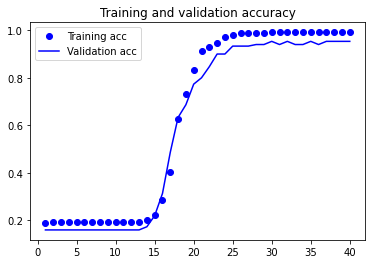

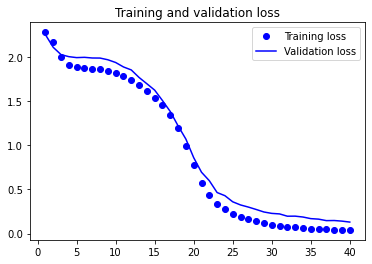

In [271]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [272]:
sequences = tokenizer.texts_to_sequences(x_test)
data = pad_sequences(sequences,maxlen = 30)
# y_test = y_test.reshape((len(y_test,)))
data.shape,y_test.shape

((39, 30), (39, 10))

In [273]:
test_loss,test_acc = model.evaluate(data,y_test,verbose=2)

39/1 - 0s - loss: 0.2947 - acc: 0.8974


## Training Accuracy: 99%
## Validation Accuracy : 95%
## Test Accuract : 89%

# Saving model

In [274]:
model.save("Ask_PIAIC.h5")

# Scrapping Data for Prediction

In [275]:
web = r.get("https://ask.piaic.org/")

In [276]:
soup = bs(web.text,"html.parser")

## Scrapping Questions

In [277]:
questions = []
for i in soup.find_all("div",class_='qa-q-item-title'):
    questions.append(i.getText().replace("\n","").replace("\t",""))

# One Hot Encoding Questions from Data Tokenizer and Predicting Questions

In [278]:
def check(li):
    
    sequences = tokenizer.texts_to_sequences(li)
    data = pad_sequences(sequences,maxlen = 30)
    prediction = model.predict(data)

    a,d=0,0
    for i in prediction[0]:
        if float(i)>a or float(i)==a:
            a=i
            d=0
        elif float(i)<a:
            d=d+1
    index = len(prediction[0])-d-1
    
    print(f'{li} : {names[index]}') 

In [279]:
for i in questions:
    check(i)

Integrate Blockchain Application : AI
Ubuntu Installation Problems : iot
why do we need CBBF certoificate? : general
B3 Q2 rust quiz but lecture not upload : blockchain
Watch videos on portal not on youtube? : general
Can i deposit fee before certification? : iot
How can I withdraw or freeze a course? : iot
Voucher Generation mail : iot
Git classes : iot
necessary install node.js : iot
Diff btw a Smrt contract and OOP class? : iot
Passing Markes : iot
Announcement section : general
Flexibility in viewing video lectures : iot
Build aiinyourcompany,aiandsocietycover? : blockchain
Explain Scarcity? : iot
blockchain business foundation exam? : blockchain
Difference b/w slack, telegm & fb groups : iot
mobile web : iot
what is scope of blockchain in pakistan? : general
I have a few questions : AI
less than 50% in Q2 : iot
how to install global surge in ubuntu : iot
docker documentation : iot
struct Vs enum : iot
Haven't received key for AIC Quiz 2 : iot
Install only linux : AI
github desktop